1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

In [24]:
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 22.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 14.0 MB

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

2. Загрузите датасет. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [2]:
x = pd.read_csv('data/22_x.csv',names=['x1','x2','x3'])
y = pd.read_csv('data/22_y.csv', names = ['Y'])

In [3]:
x.head()

,,,x1,x2,x3
-1.093220,0.606847,-1.389804,0.157096,-2.297255,0.128341
0.068189,-0.748682,-2.608495,0.822826,0.675069,-0.342655
-0.811608,0.177087,0.309421,-0.910204,0.497023,-0.159383
-0.775218,-0.434001,-0.682047,1.462780,1.126234,1.296343
0.926433,0.238571,2.291793,-2.393233,-1.564427,-2.239500


In [4]:
y.head()

,Y
0,-154.012768
1,18.202731
2,10.429360
3,170.860945
4,-299.523074


3. Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.


In [5]:
print(x.shape)
x.describe()

(414, 3)


,x1,x2,x3
count,414.000000,414.000000,414.000000
mean,0.066634,0.010922,-0.033397
std,1.058884,1.022649,1.029279
min,-2.950329,-2.788647,-2.930388
25%,-0.638367,-0.653561,-0.751798
50%,0.045475,-0.004277,-0.028745
75%,0.823746,0.659966,0.623096
max,3.037847,3.466630,3.175308


In [6]:
print(y.shape)
y.describe()

(414, 1)


,Y
count,414.000000
mean,-1.828262
std,104.928968
min,-315.650929
25%,-70.618832
50%,-7.763557
75%,66.082052
max,314.745856


4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
def r_2_score(column_name : str) -> None:

    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)
    y_result = y.predict(x_test[[column_name]].values)
    
    plt.scatter(x_test[[column_name]].values, y_test.values, color='b')
    plt.plot(x_test[[column_name]].values, y_result, color='r', linewidth=2)
   
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)
    
    print(f"R^2 score: {r_2}")

# x1

R^2 score: -0.06703810588422798


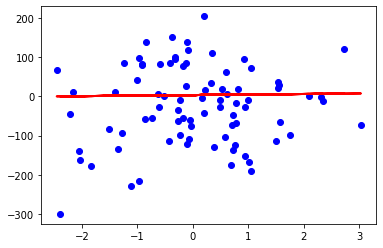

In [10]:
r_2_score("x1")

# x2

R^2 score: 0.35692779615030745


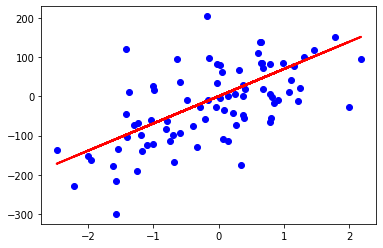

In [11]:
r_2_score("x2")

# x3

R^2 score: 0.4577158021739961


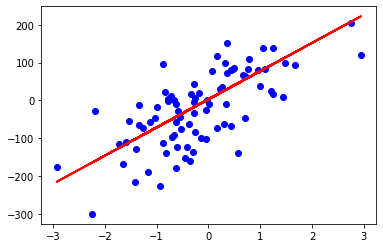

In [12]:
r_2_score("x3")

x2 и x3 демонстрируют более явную связь, чем x1

6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [13]:

y = LinearRegression().fit(x_train[['x1', 'x2', 'x3']].values, y_train.values)
y_result = y.predict(x_test[['x1', 'x2', 'x3']].values)

r_2 = y.score(x_test[['x1', 'x2', 'x3']].values,  y_test.values)

print(f"R^2 score: {r_2}")


import statsmodels.formula.api as sm

data = pd.DataFrame(np.array(x_train[['x1', 'x2', 'x3']]), 
                            columns=['x1', 'x2', 'x3'])
data['y'] = np.array(y_train)
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# Используем МНК - метод наименьших квадратов
model = sm.ols(formula='y~x1+x2+x3', data=data)
fitted = model.fit()
fitted.summary()

R^2 score: 0.9879330386843629


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.411e+04
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:54:14   Log-Likelihood:                -1205.9
No. Observations:                 331   AIC:                             2420.
Df Residuals:                     327   BIC:                             2435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0290      0.513     -0.056      0.955      -1.039       0.981
x1             0.3526      0.501      0.704      0.482      -0.632       1.337
x2            71.0680      0.502    141.469      0.000      70.080      72.056
x3            75.7814      0.501    151.347      0.000      74.796      76.766
==============================================================================
Omnibus:                        1.175   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                0.924
Skew:                          -0.100   Prob(JB):                        0.630
Kurtosis:                       3.165   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Общий показатель модели по R^2 = 0.987, что является хорошим показателем и говорит о том, что с моделью можно работать.


Наиболее влияющие факторы - x2 и x3 с коэффами 71.0680 и 75.7814 соответственно.
